### EDA and Cleaning

Loading in Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in Train and Test datasets 

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
# renaming columns 
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [4]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
[i for i in train.columns if i not in test.columns]

['saleprice']

In [8]:
train.shape

(2051, 81)

In [9]:
test.shape

(878, 80)

### finding all Null values

In [10]:
train.isnull().sum()[lambda x: x > 0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

### Figure out dtypes for each column

In [11]:
integers = []
floats = []
objects = []
other = []
for i in train.columns:
    if train[i].dtypes == 'O':
        objects.append(i)
    elif train[i].dtypes == 'int64':
        integers.append(i)
    elif train[i].dtypes == 'float64':
        floats.append(i)
    else:
        other.append(i)
     

In [12]:
train[objects].isnull().sum()

ms_zoning            0
street               0
alley             1911
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
heating              0
heating_qc           0
central_air          0
electrical           0
kitchen_qual         0
functional           0
fireplace_qu      1000
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
pool_qc           2042
fence             1651
misc_feature      1986
sale_type            0
dtype: int64

### Remove columns with large missing values 

In [13]:
### Although some of these columns could be viewed as remodeling, most houses in the dataset are without these features.

In [14]:
test.shape, train.shape

((878, 80), (2051, 81))

In [15]:
x = [i for i in train.columns if train[i].isnull().sum() > 999]
train[x].isnull().sum()

alley           1911
fireplace_qu    1000
pool_qc         2042
fence           1651
misc_feature    1986
dtype: int64

In [16]:
x = [i for i in test.columns if test[i].isnull().sum() > 400]
test[x].isnull().sum()

alley           820
fireplace_qu    422
pool_qc         874
fence           706
misc_feature    837
dtype: int64

In [17]:
train.drop(columns=x, inplace = True)

In [18]:
test.drop(columns=x, inplace = True)

In [19]:
train.drop(columns = 'mas_vnr_area', inplace=True)
test.drop(columns = 'mas_vnr_area', inplace=True)

In [20]:
train.drop(columns='pool_area', inplace = True)
test.drop(columns='pool_area', inplace = True)

In [21]:
test.shape, train.shape

((878, 73), (2051, 74))

In [22]:
train.isnull().sum()[lambda x: x > 0]

lot_frontage      330
mas_vnr_type       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_sf_1        1
bsmtfin_type_2     56
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
dtype: int64

### Changing null values of float columns to 0

In [23]:
def null_to_zero(col):
    train[col] = [0 if i == True else j for i, j in zip(train[col].isnull(), train[col])]
    return train[col].isnull().sum()

In [24]:
def null_to_zero_test(col):
    test[col] = [0 if i == True else j for i, j in zip(test[col].isnull(), test[col])]
    return test[col].isnull().sum()

In [25]:
# why i choose these >????? 

In [26]:
null_to_zero_test('lot_frontage')
null_to_zero_test('bsmtfin_sf_1')
null_to_zero_test('bsmtfin_sf_2')
null_to_zero_test('bsmt_unf_sf')
null_to_zero_test('total_bsmt_sf')
null_to_zero_test('bsmt_full_bath')
null_to_zero_test('bsmt_half_bath')
null_to_zero_test('garage_yr_blt')
null_to_zero_test('garage_cars')
null_to_zero_test('garage_area')

0

In [27]:
null_to_zero('lot_frontage')
null_to_zero('bsmtfin_sf_1')
null_to_zero('bsmtfin_sf_2')
null_to_zero('bsmt_unf_sf')
null_to_zero('total_bsmt_sf')
null_to_zero('bsmt_full_bath')
null_to_zero('bsmt_half_bath')
null_to_zero('garage_yr_blt')
null_to_zero('garage_cars')
null_to_zero('garage_area')

0

### Changing null values of object columns to 'none'

In [28]:
def null_to_none(col):
    train[col] = ['none' if i == True else j for i, j in zip(train[col].isnull(), train[col])]
    return train[col].isnull().sum()

In [29]:
def null_to_none_test(col):
    test[col] = ['none' if i == True else j for i, j in zip(test[col].isnull(), test[col])]
    return test[col].isnull().sum()

In [30]:
null_to_none('bsmt_exposure')
null_to_none('bsmtfin_type_1')
null_to_none('bsmtfin_type_2')
null_to_none('garage_type')
null_to_none('garage_finish')
null_to_none('mas_vnr_type')

0

In [31]:
null_to_none_test('bsmt_exposure')
null_to_none_test('bsmtfin_type_1')
null_to_none_test('bsmtfin_type_2')
null_to_none_test('garage_type')
null_to_none_test('garage_finish')
null_to_none_test('mas_vnr_type')

0

In [32]:
def null_to_no(col): 
    train[col] = ['No' if i == True else j for i,j in zip(train[col].isnull(), train[col])]
    return train[col].value_counts()

In [33]:
def null_to_no_test(col): 
    test[col] = ['No' if i == True else j for i,j in zip(test[col].isnull(), test[col])]
    return test[col].value_counts()

In [34]:
null_to_no_test('bsmt_qual')
null_to_no_test('bsmt_cond')
null_to_no_test('garage_qual')
null_to_no_test('garage_cond')

TA    796
No     45
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [35]:
null_to_no('bsmt_qual')

TA    887
Gd    864
Ex    184
Fa     60
No     55
Po      1
Name: bsmt_qual, dtype: int64

In [36]:
null_to_no('bsmt_cond')

TA    1834
Gd      89
Fa      65
No      55
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [37]:
null_to_no('garage_qual')

TA    1832
No     114
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [38]:
null_to_no('garage_cond')

TA    1868
No     114
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [39]:
test['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [40]:
test['electrical'] = test['electrical'].fillna('none')
test['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', 'none'], dtype=object)

In [41]:
train.isnull().sum()[lambda x: x > 0]

Series([], dtype: int64)

In [42]:
test.isnull().sum()[lambda x: x > 0]

Series([], dtype: int64)

### Dataset has numerous columns regarding aspects of a house that can be remodeled. We will focus on these columns for our features

### Save cleaned data

In [43]:
test.to_csv('../datasets/cleaned_test.csv', index = False)
train.to_csv('../datasets/cleaned_train.csv', index = False)

### SalePrice has a clear right skew distribution 

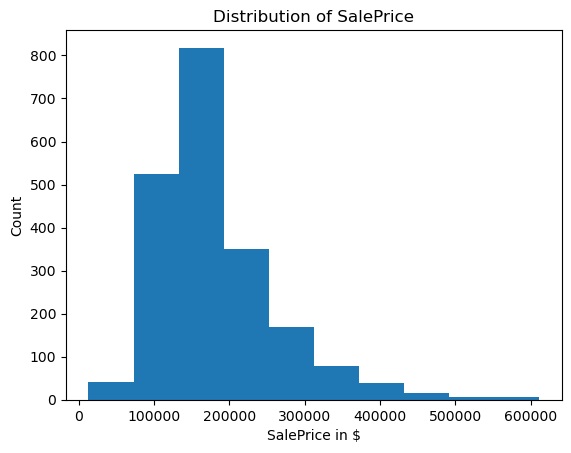

In [44]:
plt.hist(train['saleprice'])
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice in $')
plt.ylabel('Count');
plt.savefig('../images/distrib_saleprice.png')